In [60]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
     

In [61]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv(r"C:\Users\91946\Downloads\shampoo_sales.csv")
series.head()
pyplot.show()   

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3


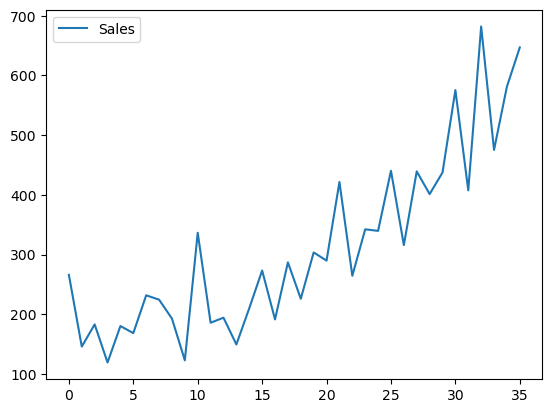

In [62]:
print(series.head())
series.plot()
pyplot.show()

In [63]:

X = series.values
X

array([['1-01', 266.0],
       ['1-02', 145.9],
       ['1-03', 183.1],
       ['1-04', 119.3],
       ['1-05', 180.3],
       ['1-06', 168.5],
       ['1-07', 231.8],
       ['1-08', 224.5],
       ['1-09', 192.8],
       ['1-10', 122.9],
       ['1-11', 336.5],
       ['1-12', 185.9],
       ['2-01', 194.3],
       ['2-02', 149.5],
       ['2-03', 210.1],
       ['2-04', 273.3],
       ['2-05', 191.4],
       ['2-06', 287.0],
       ['2-07', 226.0],
       ['2-08', 303.6],
       ['2-09', 289.9],
       ['2-10', 421.6],
       ['2-11', 264.5],
       ['2-12', 342.3],
       ['3-01', 339.7],
       ['3-02', 440.4],
       ['3-03', 315.9],
       ['3-04', 439.3],
       ['3-05', 401.3],
       ['3-06', 437.4],
       ['3-07', 575.5],
       ['3-08', 407.6],
       ['3-09', 682.0],
       ['3-10', 475.3],
       ['3-11', 581.3],
       ['3-12', 646.9]], dtype=object)

In [64]:


size = int(len(X) * 0.60)
print(len(X))
print(size)


36
21


In [65]:

train, test = X[0:size], X[size:len(X)]
     

In [66]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARIMA',
                        FutureWarning)
#warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


from statsmodels.tsa.arima.model import ARIMA


In [ ]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
     